In [1]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from functools import partial
from helpers import *
from implementations import *
from cross_validation import *
%load_ext autoreload
%autoreload 2

## Load the training data into feature matrix, class labels, and event ids:

In [2]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)

In [3]:
mean_x = np.mean(tX, axis=0)
std_x = np.std(tX, axis=0)
tx_cleaned = remove_outliers(tX, mean_x, std_x)
tx_scaled = rescale(tx_cleaned)
y0 = format_y(y)
print(tX)

[[ 138.47    51.655   97.827 ...,    1.24    -2.475  113.497]
 [ 160.937   68.768  103.235 ..., -999.    -999.      46.226]
 [-999.     162.172  125.953 ..., -999.    -999.      44.251]
 ..., 
 [ 105.457   60.526   75.839 ..., -999.    -999.      41.992]
 [  94.951   19.362   68.812 ..., -999.    -999.       0.   ]
 [-999.      72.756   70.831 ..., -999.    -999.       0.   ]]


In [4]:
print(tx_cleaned)

[[ 138.47         51.655        97.827      ...,    1.24         -2.475
   113.497     ]
 [ 160.937        68.768       103.235      ...,    0.            0.
    46.226     ]
 [ -49.02307944   49.23981928  125.953      ...,    0.            0.
    44.251     ]
 ..., 
 [ 105.457        60.526        75.839      ...,    0.            0.
    41.992     ]
 [  94.951        19.362        68.812      ...,    0.            0.            0.        ]
 [ -49.02307944   72.756        70.831      ...,    0.            0.            0.        ]]


In [5]:
print(tx_scaled)

[[ 0.23080046  0.43071317  0.58465923 ...,  0.63777778  0.10614258
   0.42177455]
 [ 0.25845691  0.57340593  0.61921558 ...,  0.5         0.5         0.17178384]
 [ 0.          0.41057475  0.76438038 ...,  0.5         0.5         0.16444439]
 ..., 
 [ 0.19016208  0.50468194  0.44415903 ...,  0.5         0.5         0.15604956]
 [ 0.17722939  0.16144552  0.3992575  ...,  0.5         0.5         0.        ]
 [ 0.          0.60665894  0.41215862 ...,  0.5         0.5         0.        ]]


In [6]:
print(y)

[ 1. -1. -1. ...,  1. -1. -1.]


In [7]:
print(y0)

[ 1.  0.  0. ...,  1.  0.  0.]


## Do your thing crazy machine learning thing here :) ...

## Prediction Formula

#### Finding a good lambda for ridge regression

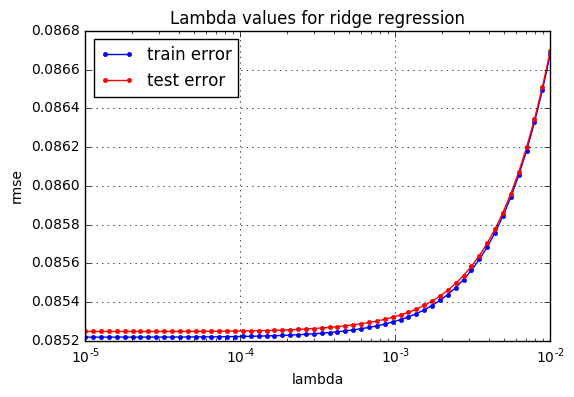

In [8]:
initial_w = np.zeros(tx_scaled.shape[1])
function_to_test = ridge_regression
k_fold = 4
lambdas = np.logspace(-5, -2, 60)
loss_tr, loss_te = finding_lambda(y0, tx_scaled, function_to_test, k_fold, 1, lambdas, compute_cost)
cross_validation_visualization("Lambda values for ridge regression", "lambda", lambdas, loss_tr, loss_te)

#### Finding a good lambda for penalized logistic regression

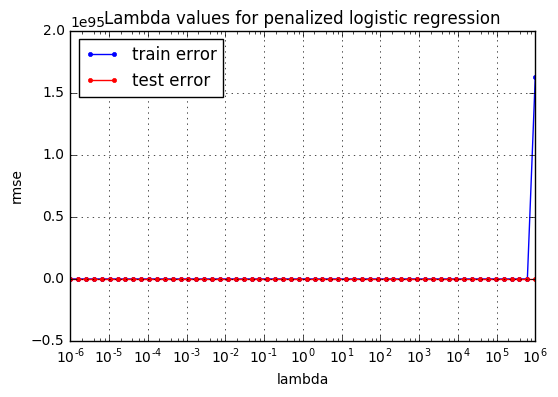

In [9]:
initial_w = np.zeros(tx_scaled.shape[1])
gamma = 0.00003
max_iters = 30
function_to_test = partial(reg_logistic_regression, initial_w=initial_w, max_iters=max_iters, gamma=gamma)
k_fold = 4
lambdas = np.logspace(-6, 6, 60)
loss_tr, loss_te = finding_lambda(y0, tx_scaled, function_to_test, k_fold, 1, lambdas, compute_loss_logistic)
cross_validation_visualization("Lambda values for penalized logistic regression", "lambda", lambdas, loss_tr, loss_te)

#### Comparing different algorithms

In [10]:
initial_w = np.zeros(tx_scaled.shape[1])
max_iters = 1000
gamma = 0.00003
lambda_ = 0.0007

In [11]:
function_to_test = least_squares
loss_tr, loss_te, w = cross_validation(y0, tx_scaled, function_to_test, 4, 0, 1, compute_cost)
loss_tr, loss_te, w

(0.085219542272393603,
 0.085248976026370687,
 array([-0.04347043, -0.52484128,  0.19795024,  0.01622859,  0.10335798,
        -0.24286234, -0.17351103,  0.18132913, -0.12607457, -0.11094505,
        -0.12329523,  0.14037244,  0.15754837,  0.36350877,  0.0021463 ,
         0.00832538,  0.06298032, -0.00202766,  0.01655919,  0.07298884,
         0.01092749,  0.01758213, -0.02597744,  0.03213754,  0.02519384,
         0.01841185,  0.51185102,  0.04479927,  0.02092541,  0.03087224]))

In [12]:
function_to_test = partial(least_squares_GD, initial_w=initial_w, max_iters=max_iters, gamma=gamma)
loss_tr, loss_te, w = cross_validation(y0, tx_scaled, function_to_test, 4, 0, 1, compute_cost)
loss_tr, loss_te, w

(0.1542308610330633,
 0.1542167710758906,
 array([ 0.00195443,  0.00229442,  0.00446078,  0.00303269,  0.00131692,
         0.00446665,  0.00471299,  0.00485449,  0.00235569,  0.00322407,
         0.00328209,  0.00591234,  0.00219335,  0.00322336,  0.00472767,
         0.00470783,  0.002428  ,  0.00470456,  0.00482134,  0.00315132,
         0.00475246,  0.00424748,  0.00479503,  0.00373597,  0.00473801,
         0.00472859,  0.00705735,  0.00473758,  0.00473263,  0.00268235]))

In [13]:
function_to_test = partial(least_squares_SGD, initial_w=initial_w, max_iters=max_iters, gamma=gamma)
loss_tr, loss_te, w = cross_validation(y0, tx_scaled, function_to_test, 4, 0, 1, compute_cost)
loss_tr, loss_te, w

(0.17131402339325691,
 0.17129400981088663,
 array([  4.19956592e-06,   5.19339099e-06,   9.63103301e-06,
          6.51836170e-06,   2.78481295e-06,   9.71027769e-06,
          1.02391803e-05,   1.05015169e-05,   5.13403643e-06,
          6.92988215e-06,   7.22874159e-06,   1.26124844e-05,
          4.63386275e-06,   6.84999562e-06,   1.02636800e-05,
          1.02162164e-05,   5.30145107e-06,   1.02141150e-05,
          1.04556075e-05,   6.86687349e-06,   1.03074731e-05,
          9.16260870e-06,   1.02915214e-05,   8.08381768e-06,
          1.02750183e-05,   1.02512269e-05,   1.52922703e-05,
          1.02713001e-05,   1.02614843e-05,   5.75528501e-06]))

In [14]:
function_to_test = partial(ridge_regression, lambda_=lambda_)
loss_tr, loss_te, w = cross_validation(y0, tx_scaled, function_to_test, 4, lambda_, 1, compute_cost)
loss_tr, loss_te, w

(0.08527200571474107,
 0.085297290051314936,
 array([-0.01795461, -0.50326097,  0.1939358 ,  0.01672327,  0.15195358,
        -0.22453288, -0.02155725,  0.17914229, -0.1232407 , -0.08245412,
        -0.11681489,  0.14242979,  0.16003546,  0.35610595,  0.00370822,
         0.01281554,  0.04769294, -0.00074061,  0.02153581,  0.06555074,
         0.0149854 ,  0.01740428, -0.02921888,  0.09084554,  0.03371583,
         0.02607809,  0.31095913,  0.05649183,  0.03057006,  0.00787749]))

In [15]:
function_to_test = partial(logistic_regression, initial_w=initial_w, max_iters=max_iters, gamma=gamma)
loss_tr, loss_te, w = cross_validation(y0, tx_scaled, function_to_test, 4, lambda_, 1, compute_cost)
loss_tr, loss_te, w

(4309.235793566294,
 0.17942508642536295,
 array([-0.00055331, -0.00320443, -0.00178562, -0.00063019,  0.00016936,
        -0.0023544 , -0.00252922, -0.00227989, -0.00125111, -0.00066831,
        -0.00261574, -0.00047263,  0.00033422, -0.000243  , -0.00230824,
        -0.00232798, -0.00138696, -0.00229286, -0.00233106, -0.001725  ,
        -0.00227763, -0.00136135, -0.00081815, -0.00161774, -0.00231492,
        -0.0023138 , -0.00336509, -0.00231449, -0.00232402, -0.00037536]))

In [16]:
function_to_test = partial(reg_logistic_regression, initial_w=initial_w, max_iters=max_iters, gamma=gamma)
loss_tr, loss_te, w = cross_validation(y0, tx_scaled, function_to_test, 4, lambda_, 1, compute_cost)
loss_tr, loss_te, w

(4309.2362625915257,
 0.17942491223129597,
 array([-0.0005533 , -0.00320436, -0.00178558, -0.00063017,  0.00016936,
        -0.00235435, -0.00252917, -0.00227985, -0.00125108, -0.00066829,
        -0.00261569, -0.00047262,  0.00033422, -0.000243  , -0.00230819,
        -0.00232793, -0.00138693, -0.00229281, -0.00233101, -0.00172497,
        -0.00227759, -0.00136132, -0.00081813, -0.00161771, -0.00231487,
        -0.00231375, -0.00336502, -0.00231444, -0.00232397, -0.00037535]))

### Compute final weights

In [17]:
loss, weights = least_squares(y, tX)

In [18]:
print(loss, weights)

0.339686809477 [  8.03494352e-05  -7.20202266e-03  -6.05417274e-03  -5.47559078e-04
  -1.93874687e-02   4.73451613e-04  -2.60379058e-02   3.25106299e-01
  -3.80780000e-05  -2.72788699e+00  -2.21220141e-01   9.50794097e-02
   6.40351609e-02   2.73614667e+00  -3.31801090e-04  -9.54325141e-04
   2.74090341e+00  -5.34165279e-04   9.73498912e-04   3.69225050e-03
   3.54487164e-04  -5.43344618e-04  -3.30448035e-01  -1.40800497e-03
   8.31432840e-04   1.02117276e-03  -1.68047418e-03  -5.83664793e-03
  -1.11088004e-02   2.72834692e+00]


## Generate predictions and save ouput in csv format for submission:

In [19]:
DATA_TEST_PATH = '../test.csv'  # TODO: download train data and supply path here
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)

In [20]:
OUTPUT_PATH = '../submission.csv'  # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, tX_test)
create_csv_submission(ids_test, y_pred, OUTPUT_PATH)